<a href="https://colab.research.google.com/github/arthurqu18/Trabalho-2-captcha/blob/main/trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# CNN
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
!pip install keras-tuner
import keras_tuner as kt
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# plot
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import zipfile
import os
import time

zip_path = 'dados.zip'
extract_path = 'dados_extraidos'

if not os.path.exists(extract_path):
  os.makedirs(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)


print(f"Arquivos extraídos para: {extract_path}")

Arquivos extraídos para: dados_extraidos


In [ ]:
from PIL import Image, ImageFilter, ImageOps
start_time = time.time()

train_dir = os.path.join(extract_path, 'dados/CAPTCHA-10k/treinamento')
val_dir = os.path.join(extract_path, 'dados/CAPTCHA-10k/validacao')
teste_dir = os.path.join(extract_path, 'dados/CAPTCHA-10k/teste')

digitos_segmentados_train = []
digitos_segmentados_val = []
digitos_segmentados_test = []

imgs_train = os.listdir(train_dir)
imgs_train.sort()
imgs_val = os.listdir(val_dir)
imgs_val.sort()
imgs_teste = os.listdir(teste_dir)
imgs_teste.sort()

for filename in imgs_train:
    if filename.endswith(".png") or filename.endswith(".jpg"):
        img_path = os.path.join(train_dir, filename)
        try:
            img = Image.open(img_path)
            largura_captcha = img.width
            largura_digito = largura_captcha // 6

            for i in range(6):
              if i == 0:
                caixa = (0, 0, 40, img.height)
              elif i == 5:
                caixa = (140, 0, 180, img.height)
              else: caixa = ((i * largura_digito)-10, 0, ((i + 1) * largura_digito)+10, img.height)

              if (i == 0 or i == 5):
                digito = img.crop(caixa)
                digito = ImageOps.expand(digito, border=(5, 0, 5, 0), fill='white')
              else:
                digito = img.crop(caixa)

              #digito_filtrado = digito.filter(ImageFilter.GaussianBlur(0.5))
              digito_array = np.array(digito.convert('L'))
              digitos_segmentados_train.append(digito_array)

        except Exception as e:
            print(f"Erro ao carregar a imagem {filename}: {e}")

# Converta a lista de arrays de imagem para um único array NumPy
x_train = np.array(digitos_segmentados_train)
x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_train = x_train.astype('float32')
x_train /= 255.

print(f"Shape de x_train: {x_train.shape}")

for filename in imgs_val:
    if filename.endswith(".png") or filename.endswith(".jpg"):
        img_path = os.path.join(val_dir, filename)
        try:
            # Abra a imagem
            img = Image.open(img_path)
            largura_captcha = img.width
            largura_digito = largura_captcha // 6

            for i in range(6):
              if i == 0:
                caixa = (0, 0, 40, img.height)
              elif i == 5:
                caixa = (140, 0, 180, img.height)
              else: caixa = ((i * largura_digito)-10, 0, ((i + 1) * largura_digito)+10, img.height)

              if (i == 0 or i == 5):
                digito = img.crop(caixa)
                digito = ImageOps.expand(digito, border=(5, 0, 5, 0), fill='white')
              else:
                digito = img.crop(caixa)


              #digito_filtrado = digito.filter(ImageFilter.GaussianBlur(0.5))
              digito_array = np.array(digito.convert('L'))
              digitos_segmentados_val.append(digito_array)

        except Exception as e:
            print(f"Erro ao carregar a imagem {filename}: {e}")

x_val = np.array(digitos_segmentados_val)
x_val = x_val.reshape(x_val.shape[0], 50, 50, 1)
x_val = x_val.astype('float32')
x_val /= 255.

print(f"Shape de x_val: {x_val.shape}")

for filename in imgs_teste:
    if filename.endswith(".png") or filename.endswith(".jpg"):
        img_path = os.path.join(teste_dir, filename)
        try:
            # Abra a imagem
            img = Image.open(img_path)
            largura_captcha = img.width
            largura_digito = largura_captcha // 6

            for i in range(6):
              if i == 0:
                caixa = (0, 0, 40, img.height)
              elif i == 5:
                caixa = (140, 0, 180, img.height)
              else: caixa = ((i * largura_digito)-10, 0, ((i + 1) * largura_digito)+10, img.height)

              if (i == 0 or i == 5):
                digito = img.crop(caixa)
                digito = ImageOps.expand(digito, border=(5, 0, 5, 0), fill='white')
              else:
                digito = img.crop(caixa)


              #digito_filtrado = digito.filter(ImageFilter.GaussianBlur(0.5))
              digito_array = np.array(digito.convert('L'))
              digitos_segmentados_test.append(digito_array)

        except Exception as e:
            print(f"Erro ao carregar a imagem {filename}: {e}")

x_test = np.array(digitos_segmentados_test)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)
x_test = x_test.astype('float32')
x_test /= 255.

print(f"Valor máximo em x_train após normalização: {np.max(x_train)}")
print(f"Valor mínimo em x_train após normalização: {np.min(x_train)}")
print(f"Shape de x_test: {x_test.shape}")
end_time = time.time()
print(f"Tempo de processamento: {end_time - start_time:.2f}s")

Shape de x_train: (48000, 50, 50, 1)
Shape de x_val: (6000, 50, 50, 1)
Valor máximo em x_train após normalização: 1.0
Valor mínimo em x_train após normalização: 0.0
Shape de x_test: (6000, 50, 50, 1)
Tempo de processamento: 14.06s


In [ ]:
labels_dir = os.path.join(extract_path, 'dados/CAPTCHA-10k/labels10k')
y_train_labels = []
y_val_labels = []
y_test_labels = []

try:
  label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]
  label_files.sort()

  for i in range(10000):
    if i < len(label_files):
      file_path = os.path.join(labels_dir, label_files[i])
      if(i < 8000):
        with open(file_path, 'r') as f:
          label_content = f.read().strip() #separa os 6 digitos
          label_line = label_content[:6]
          y_train_labels.extend(list(label_line))
      if(i >= 8000 and i < 9000):
          with open(file_path, 'r') as f:
            label_content = f.read().strip() #separa os 6 digitos
            label_line = label_content[:6]
            y_val_labels.extend(list(label_line))
      if(i >= 9000):
          with open(file_path, 'r') as f:
            label_content = f.read().strip() #separa os 6 digitos
            label_line = label_content[:6]
            y_test_labels.extend(list(label_line))

    else:
        print(f"Aviso: Menos de 8000 arquivos de labels encontrados. Parando em {i} arquivos.")
        break

except FileNotFoundError:
    print(f"Erro: Diretório de labels não encontrado em {labels_dir}")
except Exception as e:
    print(f"Erro ao ler os arquivos de labels: {e}")

y_train = np.array(y_train_labels)
y_val = np.array(y_val_labels)
y_test = np.array(y_test_labels)

print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_val: {y_val.shape}")
print(f"Shape de y_test: {y_test.shape}")

Shape de y_train: (48000,)
Shape de y_val: (6000,)
Shape de y_test: (6000,)


x_train[0] shape: (50, 50, 1)


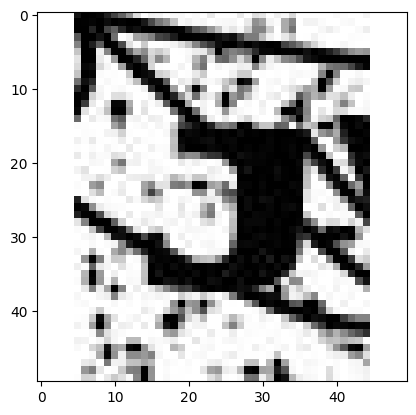

y_test[0]: J
y_test shape: (6000,)


In [ ]:
print(f'x_train[0] shape: {x_test[0].shape}')
plt.imshow(x_test[0], cmap='gray')
plt.show()
print(f'y_test[0]: {y_test[0]}')
print(f'y_test shape: {y_test.shape}')

In [ ]:
char_to_int = {char: i for i, char in enumerate('0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ?')} #dicionario para todos as letras, digitos;
print(char_to_int)

# Função para converter array de strings para array de inteiros
def labels_to_integers(labels_array, mapping):
    integer_labels = []
    for char_label in labels_array:
        if char_label in mapping:
            integer_labels.append(mapping[char_label])
        else:
            print(f"Caractere '{char_label}' não encontrado no mapeamento.")
            pass
    return np.array(integer_labels)

y_train_int = labels_to_integers(y_train, char_to_int)
y_val_int = labels_to_integers(y_val, char_to_int)
y_test_int = labels_to_integers(y_test, char_to_int)


Y_train = to_categorical(y_train_int, 37)
Y_val = to_categorical(y_val_int, 37)
Y_test = to_categorical(y_test_int, 37)

print(f"{Y_train.shape}")
print(f"{Y_val.shape}")
print(f"{Y_test.shape}")
print(f'class id: {Y_train[0]}')
print(f'Network ouptut: {Y_train[0][:]}')

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, '?': 36}
(48000, 37)
(6000, 37)
(6000, 37)
class id: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Network ouptut: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
def build_model(hp):
  model = Sequential()

  # CNN input layer
  hp_filters1 = hp.Int('filters_conv1', min_value=16, max_value=64, step=16)
  model.add(Conv2D(hp_filters1, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=x_train[0].shape))

  # hiden layers
  hp_filters2 = hp.Int('filters_conv2', min_value=16, max_value=64, step=16)
  model.add(Conv2D(hp_filters2, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), padding='same')) #25x15

  hp_dropout1 = hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)
  model.add(Dropout(hp_dropout1))

  model.add(MaxPooling2D(pool_size=(2,2), padding='same')) #13x8
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(0.25))

  # fully connected layer
  model.add(Flatten()) #32*25x15

  hp_units_dense = hp.Int('units_dense', min_value=32, max_value=128, step=32)
  model.add(Dense(hp_units_dense, activation='relu'))#(32*25x15) * 32

  hp_dropout2 = hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)
  model.add(Dropout(hp_dropout2))

  model.add(Dense(37, activation='softmax'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate), # Use tf.keras.optimizers
                  metrics=['accuracy'])

  return model

# tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=10,
#                         executions_per_trial=1, directory='my_dir', project_name='captcha_tuner')

# tuner.search(x_train, Y_train, epochs=10, validation_data=(x_val, Y_val))

# best_model = tuner.get_best_models(num_models=1)[0]
# best_hiperparametros = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f'Best model: {best_model}')
# print(f'Best model summary: {best_model.summary()}')
# print(f'Best hyperparameters: {best_hiperparametros}')

###Modelo após achar os hiperparâmetros

In [ ]:
model = Sequential()

# CNN input layer
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=x_train[0].shape))

# hiden layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same')) #25x15

model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2), padding='same')) #13x8
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))

# fully connected layer
model.add(Flatten()) #32*25x15

model.add(Dense(64, activation='relu'))#(32*25x15) * 32

model.add(Dropout(0.5))

model.add(Dense(37, activation='softmax'))

melhor_learning_rate = 0.001
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 37)             │         2,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,629 (1.38 MB)

 Trainable params: 362,629 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_checkpoint_callback = ModelCheckpoint(
     'melhor_modelo.keras',
     monitor='val_accuracy',
     mode='max',
     save_best_only=True,
     verbose=1)

model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

start_time = time.time()
response = model.fit(x_train, Y_train,
           batch_size=128, epochs=30, verbose=1, validation_data=(x_val, Y_val), callbacks=[model_checkpoint_callback])
end_time = time.time()

training_time = end_time - start_time
print(f"Tempo de treinamento: {training_time:.2f}s")

try:
  model = load_model('melhor_modelo.keras')
  print("Modelo carregado com sucesso!")
except:
  print("Erro ao carregar o modelo.")

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.2666 - loss: 2.6457
Epoch 1: val_accuracy improved from -inf to 0.90017, saving model to melhor_modelo.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 200s 528ms/step - accuracy: 0.2671 - loss: 2.6435 - val_accuracy: 0.9002 - val_loss: 0.3921
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.7850 - loss: 0.7082
Epoch 2: val_accuracy improved from 0.90017 to 0.94367, saving model to melhor_modelo.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 204s 533ms/step - accuracy: 0.7851 - loss: 0.7080 - val_accuracy: 0.9437 - val_loss: 0.2167
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.8641 - loss: 0.4524
Epoch 3: val_accuracy improved from 0.94367 to 0.96083, saving model to melhor_modelo.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 202s 533ms/step - accuracy: 0.8642 - loss: 0.4523 - val_accuracy: 0.9608 - val_loss: 0.1501
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.8975 - loss: 0.3498
Epoch 4: val

In [ ]:
start_time = time.time()

score = model.evaluate(x_test, Y_test, verbose=1)
end_time = time.time()
print(f"Tempo de avaliação: {end_time - start_time:.2f}s")

188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9746 - loss: 0.1277
Tempo de avaliação: 10.72s


In [ ]:
from sklearn import metrics

y_pred = model.predict(x_test)

y_pred = np.argmax(y_pred, axis=1)
y_true_valor = np.argmax(Y_test, axis=1)

print(f'Acuracia: {metrics.accuracy_score(y_true_valor, y_pred)}')

188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step
Acuracia: 0.9753333333333334


##Output gráfico

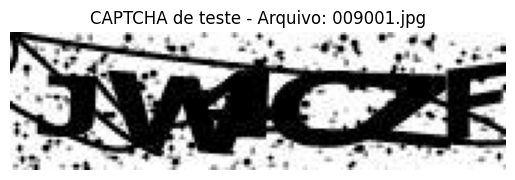

JW4CZF



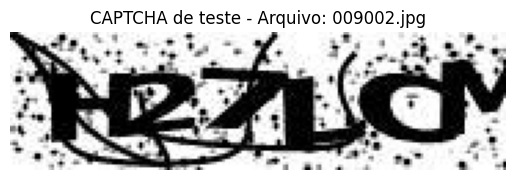

H27LCM



In [ ]:
int_to_char = {i: char for char, i in char_to_int.items()}

teste_dir = os.path.join(extract_path, 'dados/CAPTCHA-10k/teste')
imgs_teste = os.listdir(teste_dir)
imgs_teste.sort()

# Seleciona aleatoriamente DOIS arquivos de imagem de CAPTCHA da pasta de teste
filenames_captcha_aleatorios = [imgs_teste[0], imgs_teste[1]]

for filename_captcha_aleatorio in filenames_captcha_aleatorios:
    img_path = os.path.join(teste_dir, filename_captcha_aleatorio)

    try:
        # Abre a imagem do CAPTCHA
        img_captcha = Image.open(img_path)

        # Exibe a imagem do CAPTCHA
        plt.imshow(img_captcha, cmap='gray')
        plt.title(f"CAPTCHA de teste - Arquivo: {filename_captcha_aleatorio}")
        plt.axis('off') # Desativa os eixos para melhor visualização
        plt.show()

        # Agora, precisamos encontrar os rótulos correspondentes para este CAPTCHA
        try:
            indice_arquivo = imgs_teste.index(filename_captcha_aleatorio)
            indice_inicio_labels = indice_arquivo * 6

            # Obtém os rótulos verdadeiros e previstos para os 6 dígitos deste CAPTCHA
            rotulos_verdadeiros_ids = y_true_valor[indice_inicio_labels : indice_inicio_labels + 6]
            rotulos_previstos_ids = y_pred[indice_inicio_labels : indice_inicio_labels + 6]

            # Converte os IDs dos rótulos para caracteres
            rotulos_verdadeiros_chars = [int_to_char[id] for id in rotulos_verdadeiros_ids]
            rotulos_previstos_chars = [int_to_char[id] for id in rotulos_previstos_ids]

            print(f"{''.join(rotulos_previstos_chars)}\n")

        except ValueError:
            print(f"Erro: Arquivo '{filename_captcha_aleatorio}' não encontrado na lista de arquivos processados.")
        except IndexError:
            print(f"Erro: Índice fora dos limites para os rótulos. Verifique a correspondência entre imagens e rótulos.")


    except Exception as e:
        print(f"Erro ao carregar a imagem {filename_captcha_aleatorio}: {e}")

6000
6000
{1: 1000, 2: 1000, 3: 1000, 4: 999, 5: 988, 6: 865}


/tmp/ipython-input-27-2178801766.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(range(1,7), id_acertos_percentage, 'b', color='blue', marker='o')


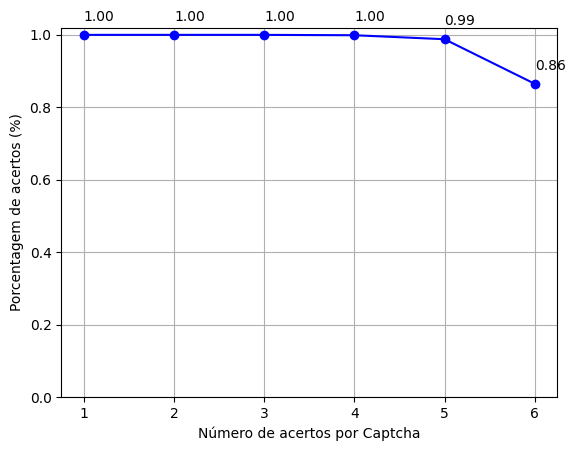

In [ ]:
import pandas as pd
id_acertos = {}

for k in range(1, 7):
  id_acertos[k] = 0

print(len(y_pred))
print(len(y_true_valor))

for i in range(1000):
  acertos = 0
  for j in range(6):
    if (y_pred[i*6+j] == y_true_valor[i*6+j]):
      acertos += 1

  max_acertos = acertos
  while max_acertos > 0:
    id_acertos[max_acertos] += 1;
    max_acertos -= 1;

print(id_acertos)
id_acertos_percentage = (np.array(list(id_acertos.values())) / 1000)

plt.plot(range(1,7), id_acertos_percentage, 'b', color='blue', marker='o')
plt.ylabel('Porcentagem de acertos (%)')
plt.xlabel('Número de acertos por Captcha')
plt.ylim(0, 1.02)
plt.grid(True)

# Add text annotations for each data point
for i, txt in enumerate(id_acertos_percentage):
    plt.annotate(f'{txt:.2f}', (i + 1, id_acertos_percentage[i]), textcoords="offset points", xytext=(0,10), ha='left')

plt.show()

In [ ]:
model_file = 'melhor_modelo.keras'
model_size_bytes = os.path.getsize(model_file)
model_size_kb = model_size_bytes / 1024

print(f"Tamanho do modelo: {model_size_kb:.2f} KB")

Tamanho do modelo: 2877.81 KB
